# Using Machine Learning techniques to detect Phishing in webpages.

Phishing is a method of social engineering attack often used to steal personal data of a user or an entity, including login credentials and credit card numbers using deceptive websites and e-mails.

In this notebook, we will read the data and look at the features that are responsible for giving us information on what are the attributes of a phishing website.

Initially, we will import some of the very important packages necessary for our machine learning techniques for the given data.

In [1]:
#importing the important libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now, we start by deciding to load our dataset using the read_csv method of Pandas.

In [2]:
#reading the dataset
data = pd.read_csv("Phishing_dataset.csv")

We can view the details of our loaded dataset as below:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [4]:
#renaming a column for ease
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

Now, we can take a look at our dataset. We select 5 rows randomly from our dataset which shows that we have a mixture of data in different ranges, some columns have bigger range whereas some have smaller range.

In [5]:
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
8643,8644,2,0,1,54,0,0,0,0,2,...,0,0,0,1,0,0,1,0,1,0
5998,5999,4,1,4,160,0,0,0,0,0,...,0,0,0,1,-1,-1,1,-1,1,0
3957,3958,6,4,4,63,0,0,0,0,0,...,0,0,0,-1,0,1,0,1,-1,1
276,277,3,1,3,76,1,1,0,0,0,...,0,0,0,1,-1,1,1,1,1,1
3899,3900,2,0,2,46,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1


Then, we use the describe method, where we can see some of the columns have small variance while some have higher variance. This is due to the fact that some of the column have bigger ranges and bigger values

In [6]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking for null values

In [7]:
#check for missing values
data.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


<AxesSubplot:>

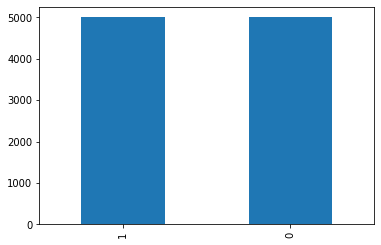

In [8]:
data['labels'].value_counts().plot(kind='bar')

# Use of Correlation method

By using the following correlation method, we can find out which features are linearly correlated in terms of predicting if a website is phished or not.

Initially, we start with the first 10 columns against the labels. On analyaing that, we conclude that none of the features from the top 10 features have a strong correlation with the labels, however, NumDash has somewhat significantly negative effect towards the labels, which might mean that if there is less number of dash then it is more likely to be phising site.

In [9]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

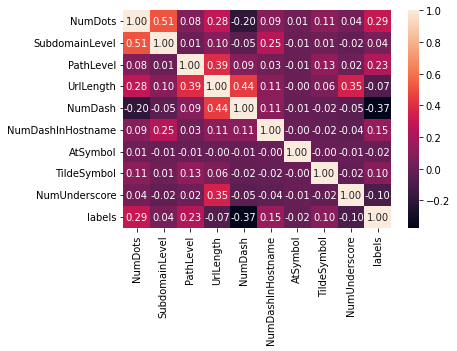

In [10]:
#correlation heatmap
corr_heatmap(data, 0, 10)

Then, we try the same with the next 10 features. There are no strong or even medium level strength correlation features with labels for these features.

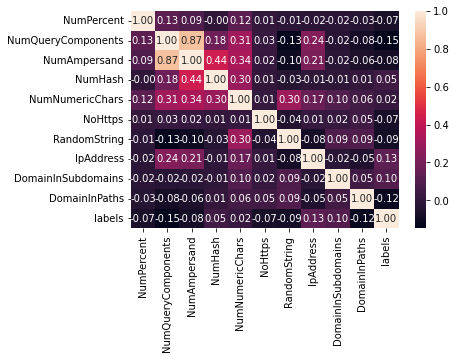

In [11]:
corr_heatmap(data, 10, 20)


In this way, we check if there is any correlation 

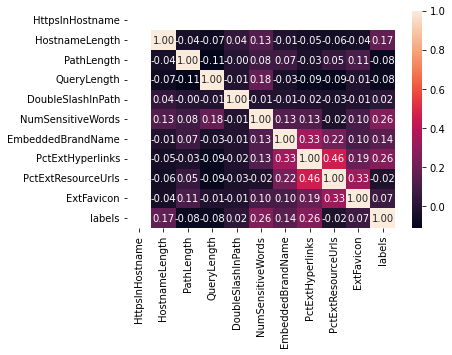

In [12]:
corr_heatmap(data, 20, 30)

Upon trying the same thing for columns 30 to 40,we see that there are a few features that are correlated to our dependent variable.

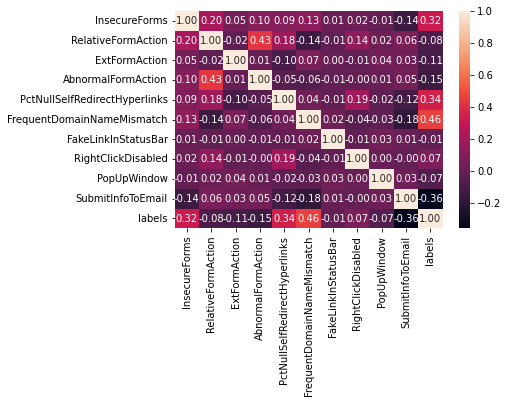

In [13]:
corr_heatmap(data, 30, 40)

For features in columns 40 to 50, we observe that there is only one column over here that has some correlation which has a negative effect with labels which is, PctExtNullSelfRedirectHyperlinksRT

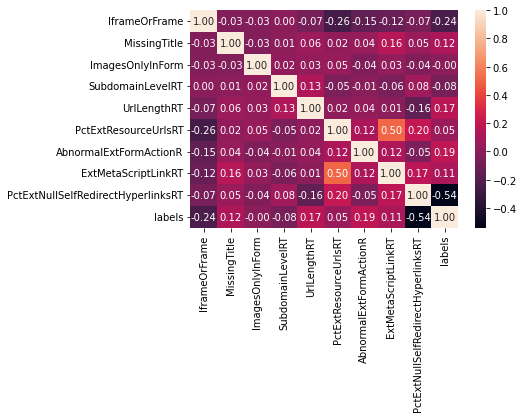

In [14]:
corr_heatmap(data, 40, 50)

# Exploratory Data Analysis

<AxesSubplot:>

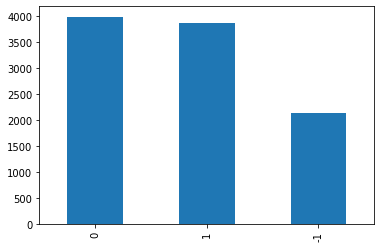

In [15]:
data['ExtMetaScriptLinkRT'].value_counts().plot.bar() 

<AxesSubplot:>

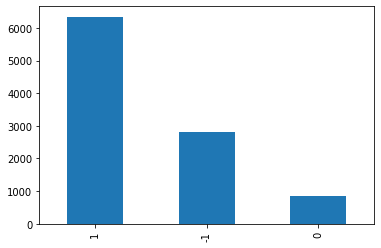

In [16]:
data['PctExtResourceUrlsRT'].value_counts().plot.bar() 

<AxesSubplot:>

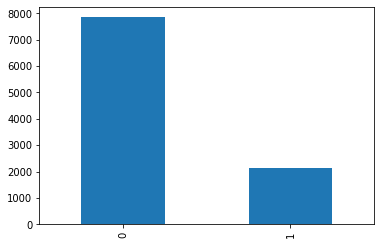

In [17]:
data['FrequentDomainNameMismatch'].value_counts().plot.bar() 

# Correlation between features and labels

We will use mutual info classifier to find non linear and linear correlation betweem the features and labels.

Initially, we import the classifier first.

In [18]:
from sklearn.feature_selection import mutual_info_classif

Then, we process the scores and we can see that now mutual info is showing a bit different list

In [19]:
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [20]:
discrete_features = X.dtypes == int

In [21]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      4.691540e-01
PctExtResourceUrls                    2.999255e-01
PctNullSelfRedirectHyperlinks         2.383462e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

Then, we perform a visualization method over the features as per the miscores.

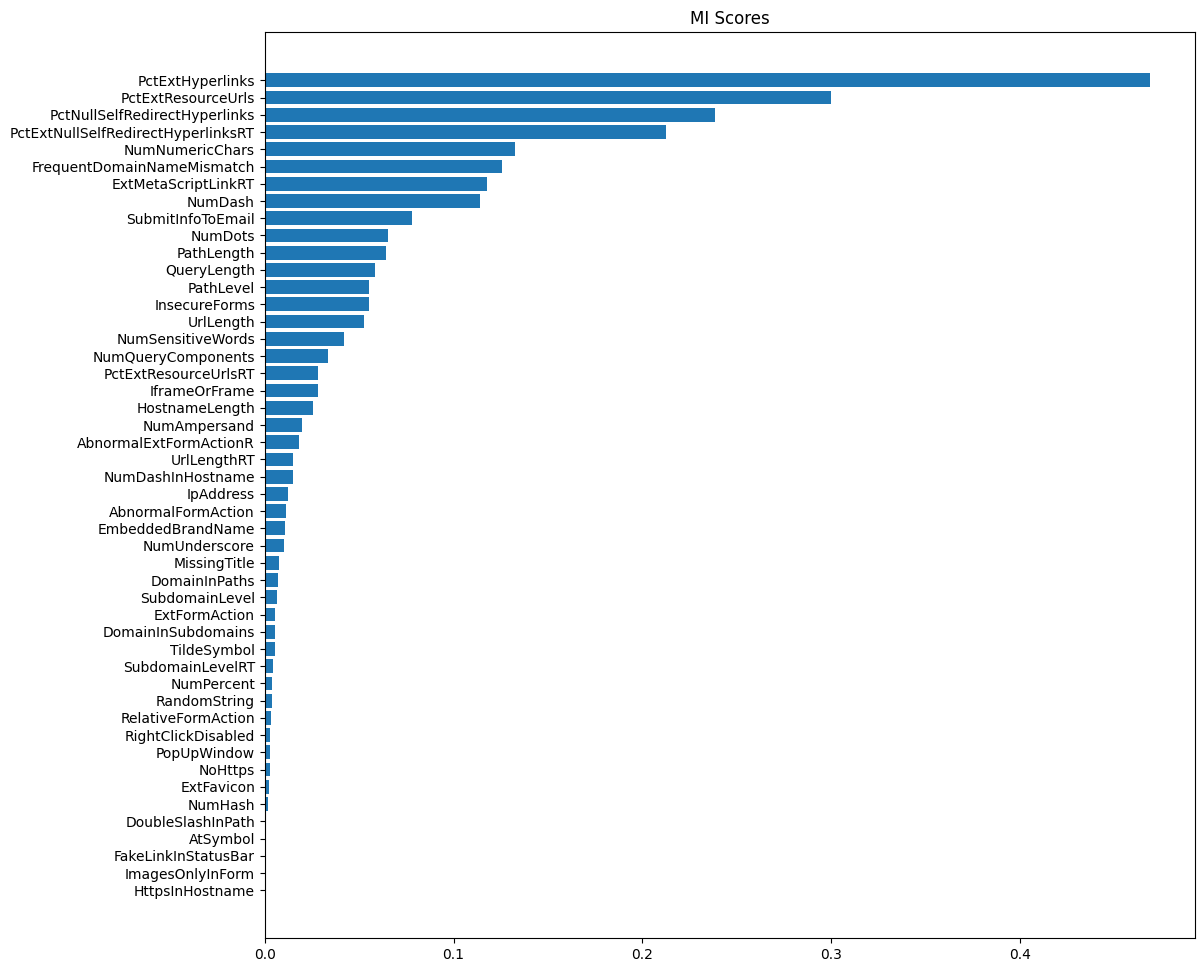

In [22]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

# Logistic Regression

Firstly, we use the logistic regression as for baseline, then we will be trying to beat the baseline using Extra Trees.
classifer

Our evaluation metrics will be accuracy, precision, recall and f1 score.

So, we start that by loading the required libraries.



In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

This method is for performing a repetitive training process by using the logistic regression model. The purpose for this is to find the optimum number of features which can be used to find the best fitted model without adjusting much of the hyperparameters. Thus, the idea over here is to go with Data-Centric training,i.e. basically the method takes number of top N features to be used for training the model and all the evaluation metrics are returned for the evaluation purpose



In [24]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

Now, the loop will be starting from 20 as we will start training with top 20 features up to all 50 features to find out the optimum number of features needed for this problem

In [25]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9241245136186771, recall : 0.9332023575638507, f1 score : 0.9286412512218963, accuracy : 0.927
Performance for Logistic Model with Top 21 features is precision : 0.9225621414913958, recall : 0.935077519379845, f1 score : 0.9287776708373436, accuracy : 0.926
Performance for Logistic Model with Top 22 features is precision : 0.9099099099099099, recall : 0.9439252336448598, f1 score : 0.926605504587156, accuracy : 0.928
Performance for Logistic Model with Top 23 features is precision : 0.914505283381364, recall : 0.945382323733863, f1 score : 0.9296875, accuracy : 0.928
Performance for Logistic Model with Top 24 features is precision : 0.9191321499013807, recall : 0.9395161290322581, f1 score : 0.9292123629112662, accuracy : 0.929
Performance for Logistic Model with Top 25 features is precision : 0.9106256206554121, recall : 0.9376278118609407, f1 score : 0.9239294710327456, accuracy : 0.9245
Performance for Logistic Mod

# Accuracy for Logistic Regression

In [26]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.924125,0.933202,0.928641,0.9270
1,21,0.922562,0.935078,0.928778,0.9260
2,22,0.909910,0.943925,0.926606,0.9280
3,23,0.914505,0.945382,0.929688,0.9280
4,24,0.919132,0.939516,0.929212,0.9290
5,25,0.910626,0.937628,0.923929,0.9245
6,26,0.925197,0.942828,0.933929,0.9335
7,27,0.930010,0.948192,0.939013,0.9370
8,28,0.927783,0.943878,0.935761,0.9365
9,29,0.928571,0.936821,0.932678,0.9315


Here, we could see that, the model had ups and downs during the training as more number of features were added, as our target is to maximize all the metrics we have to find the number of features that gives us the best of all metrics.
From the figure below, we can see that recall is constantly performing good but our model tend to have problem with precision score. Therefore, to choose the best N of features, we have to pick the area where all the metrics are performing and based on the figure I would say its around 39 features

<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

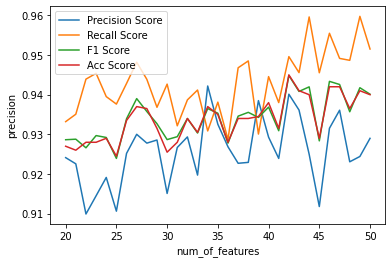

In [27]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

# Extra Trees Classifier

In [28]:
from sklearn.ensemble import ExtraTreesClassifier # this is a method alternative to k-best

In [29]:
model = ExtraTreesClassifier()
model.fit(X,y) # pass the input and output data to the method

ExtraTreesClassifier()

In [30]:
model.feature_importances_  # compute the scores

array([1.41076063e-02, 6.99037488e-03, 2.14654737e-02, 1.14894698e-02,
       2.08481160e-02, 6.59164401e-03, 9.09917108e-05, 2.15361957e-03,
       7.16275420e-03, 3.04545825e-03, 1.72682474e-02, 8.94099461e-03,
       6.68182234e-04, 2.34332518e-02, 3.86603723e-03, 7.17078892e-03,
       4.14269946e-03, 2.73759368e-03, 6.84241244e-03, 0.00000000e+00,
       9.50443747e-03, 1.22785742e-02, 1.30897449e-02, 2.19419375e-04,
       1.99997258e-02, 4.28470259e-03, 1.04351392e-01, 5.02292399e-02,
       1.83228546e-02, 5.58309340e-02, 1.10794076e-02, 5.51554494e-03,
       4.83909014e-03, 6.94972566e-02, 9.38776719e-02, 5.07454084e-04,
       1.40416752e-03, 5.74930498e-04, 5.35375871e-02, 3.97526037e-02,
       6.39888659e-03, 2.89878054e-03, 2.37489028e-03, 9.06979140e-03,
       1.67672896e-02, 1.11393522e-02, 6.82120887e-02, 1.45426466e-01])

In [31]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)  # put the scores in a series

<AxesSubplot:>

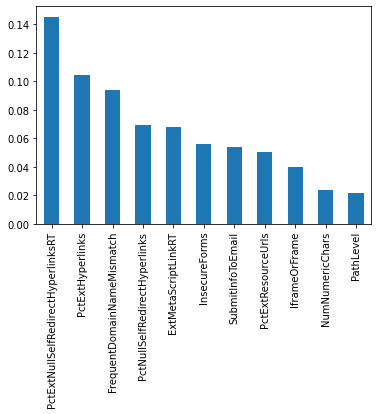

In [32]:
ranked_features.nlargest(11).plot(kind='bar')  # rank and plot the scores

# Support Vector Classification (SVC)

In [33]:
# for this, we will import another library so that we don`t have to code everything from scratch
from sklearn.model_selection import train_test_split

# create the four relevant arrays as follows:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
# the test_size parameter represents the % of the data used for testing (0.2 = 20%)
# setting random_state to 42 ensures the validation is not randomised (not very intuitive so feel free to ignore this - this is how the method is designed)

In [34]:
# importing the cross-validation library

from sklearn.model_selection import cross_val_score

In [35]:
# define our validation function which we will call 'classify'
# It takes three parameters: a model, inputs 'x' and output 'y'
# We do this because we would like to call this function multiple times using different models

def classify(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is: ', model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5)                  # we set the number of folds to 5
    print('Cross validation Accuaracy: ', np.mean(score)*100)

In [36]:
# Repeat for SVC

from sklearn.svm import SVC
SVC_model = SVC(kernel='linear', C = 1)
classify(SVC_model, X,y)

Accuracy is:  94.05
Cross validation Accuaracy:  93.37


# Confusion Matrix for SVC

In [37]:
# Let's reinitialise SVC

from sklearn.svm import SVC
SVC_model = SVC(kernel='linear', C = 1)

In [38]:
SVC_model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [39]:
y_pred = SVC_model.predict(x_test) # save predictions in y_pred

In [40]:
# We will use the confusion_matrix library for this

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

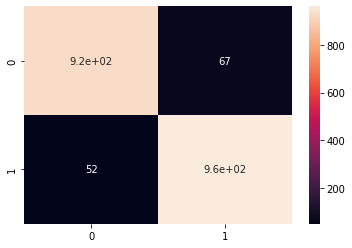

In [41]:
sns.heatmap(cm,annot=True) # plots the confusion matrix